In [3]:
"""
General imports and loading of the audio file for development and explorative research.
The audio signal is normalized in the time domain to its highest value.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os
%run transient_shaper_lib.ipynb

SAMPLE_LENGTH = 10

def read_audio_files(directory):
  """
  Reads all audio files from a directory and returns their data with file name labels.

  Args:
      directory: The directory path (string).

  Returns:
      A list of tuples, where each tuple contains:
          - The audio data as a NumPy array.
          - The filename (without extension).
  """

  audio_data_list = []
  for filename in os.listdir(directory):
    if filename.endswith(".wav"):  # Check for .wav files
        filepath = os.path.join(directory, filename)
        sample_rate, audio_data = sp.io.wavfile.read(filepath)
        try:
          audio_data = audio_data[:, 0]
        except:
          pass
        n_bits = 32  # Assuming 32-bit audio
        audio_data = audio_data / (2**(n_bits - 1))  # Adjust range to -1 to 1 
        audio_data /= np.abs(np.max(audio_data))  # Safer normalization
        audio_data = audio_data[: sample_rate * SAMPLE_LENGTH]
        label = os.path.splitext(filename)[0]  # Extract filename without extension
        audio_data_list.append((audio_data, label, sample_rate))

  return audio_data_list

audio_data_with_labels = read_audio_files(os.getcwd())

print("Audio data and labels:")
for audio_data, label, sample_rate in audio_data_with_labels:
  print(f"- Label: {label}, Audio data shape: {audio_data.shape}, Sample rate: {sample_rate}")

FRAME_LEN = 1   # in s


Audio data and labels:
- Label: 1 - 4 - 20221106_GNOSSIENNE No. 1 on GUITAR! (Erik Satie), Audio data shape: (452350,), Sample rate: 96000
- Label: 11 - Vocal A, Audio data shape: (315851,), Sample rate: 96000
- Label: 12465, Audio data shape: (371824,), Sample rate: 96000
- Label: 21 - 20230323_100 gecs - Dumbest girl alive lyrics video, Audio data shape: (307926,), Sample rate: 96000
- Label: 23 - 20220811_Westberlin Bass, Audio data shape: (614763,), Sample rate: 96000
- Label: 26 - Jorja Smith - Teenage Fantasy, Audio data shape: (491054,), Sample rate: 96000
- Label: 7 - 330744__alonnaallen__90s-beat-loop-140bpm, Audio data shape: (246743,), Sample rate: 96000
- Label: asdf, Audio data shape: (371525,), Sample rate: 96000
- Label: elli, Audio data shape: (585468,), Sample rate: 96000


1 - 4 - 20221106_GNOSSIENNE No. 1 on GUITAR! (Erik Satie)
Tempo:  152.54237288135593
TA1:  0.0421875
TA2:  0.24497916666666666
-------
TA1 python percentile:  0.0421875
TA2 python percentile::  0.24497916666666666


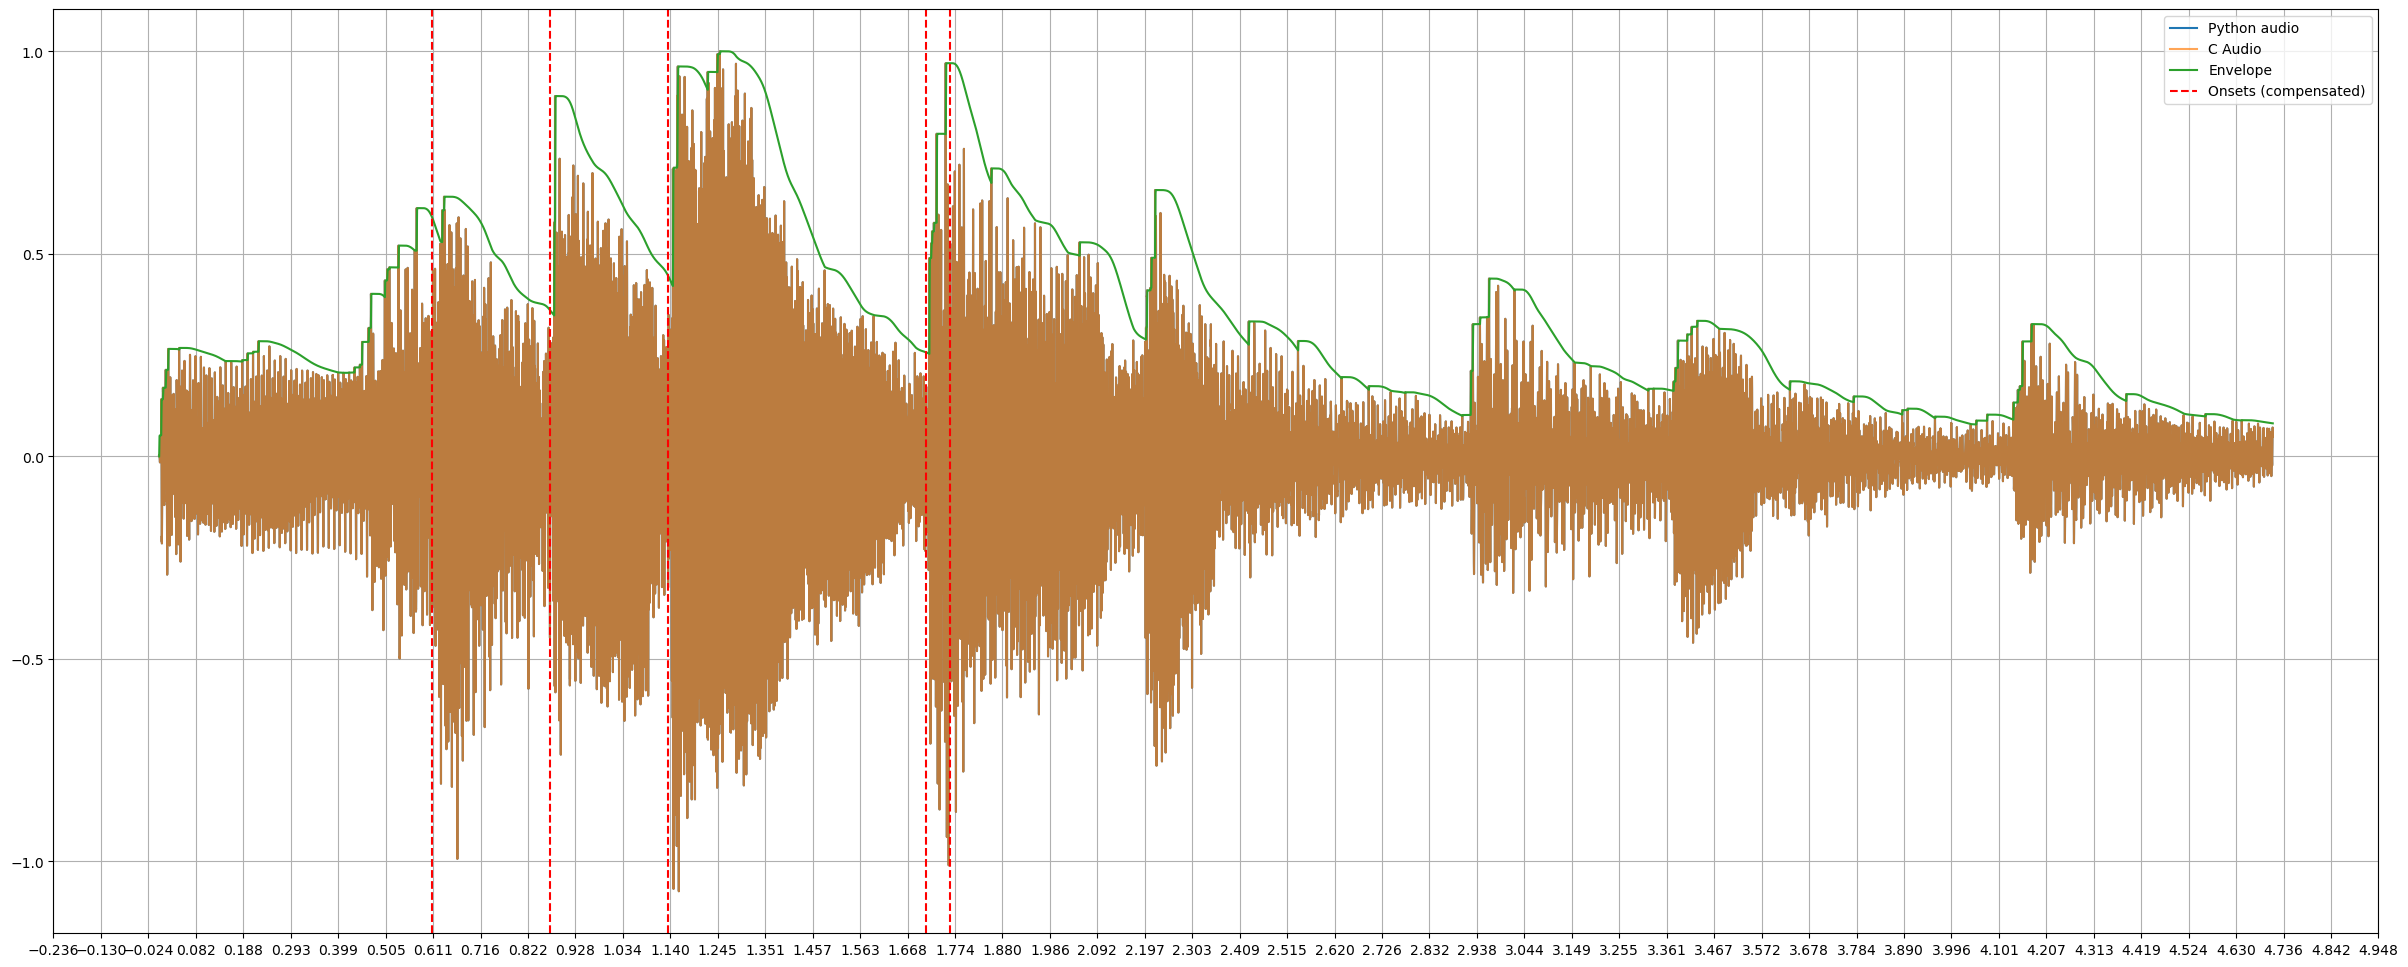

11 - Vocal A
Tempo:  117.49347258485639
TA1:  0.04084375
TA2:  0.31002083333333336
-------
TA1 python percentile:  0.062828125
TA2 python percentile::  0.36028906250000003


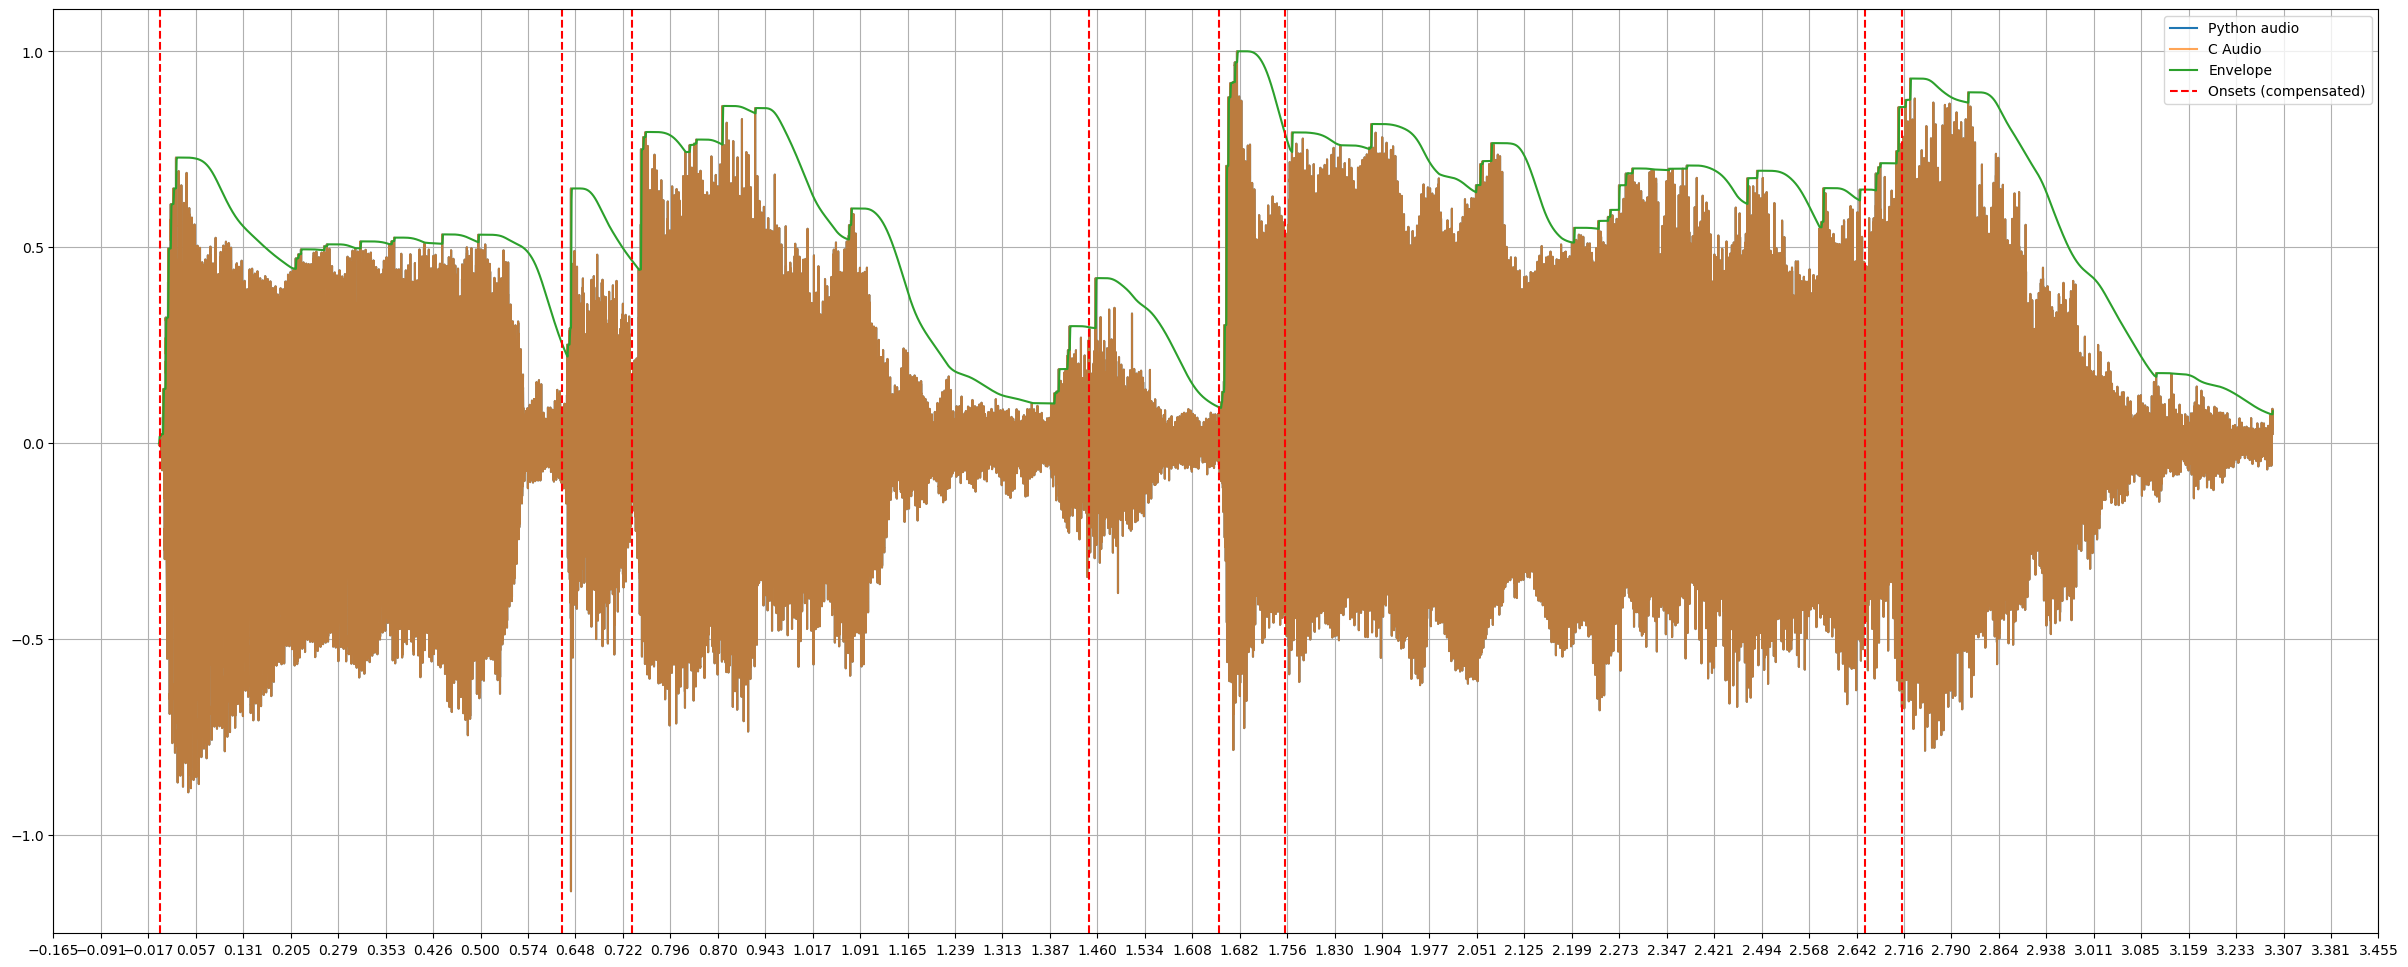

12465
Tempo:  123.96694214876032
TA1:  0.012354166666666666
TA2:  0.225875
-------
TA1 python percentile:  0.012747395833333333
TA2 python percentile::  0.22598177083333332


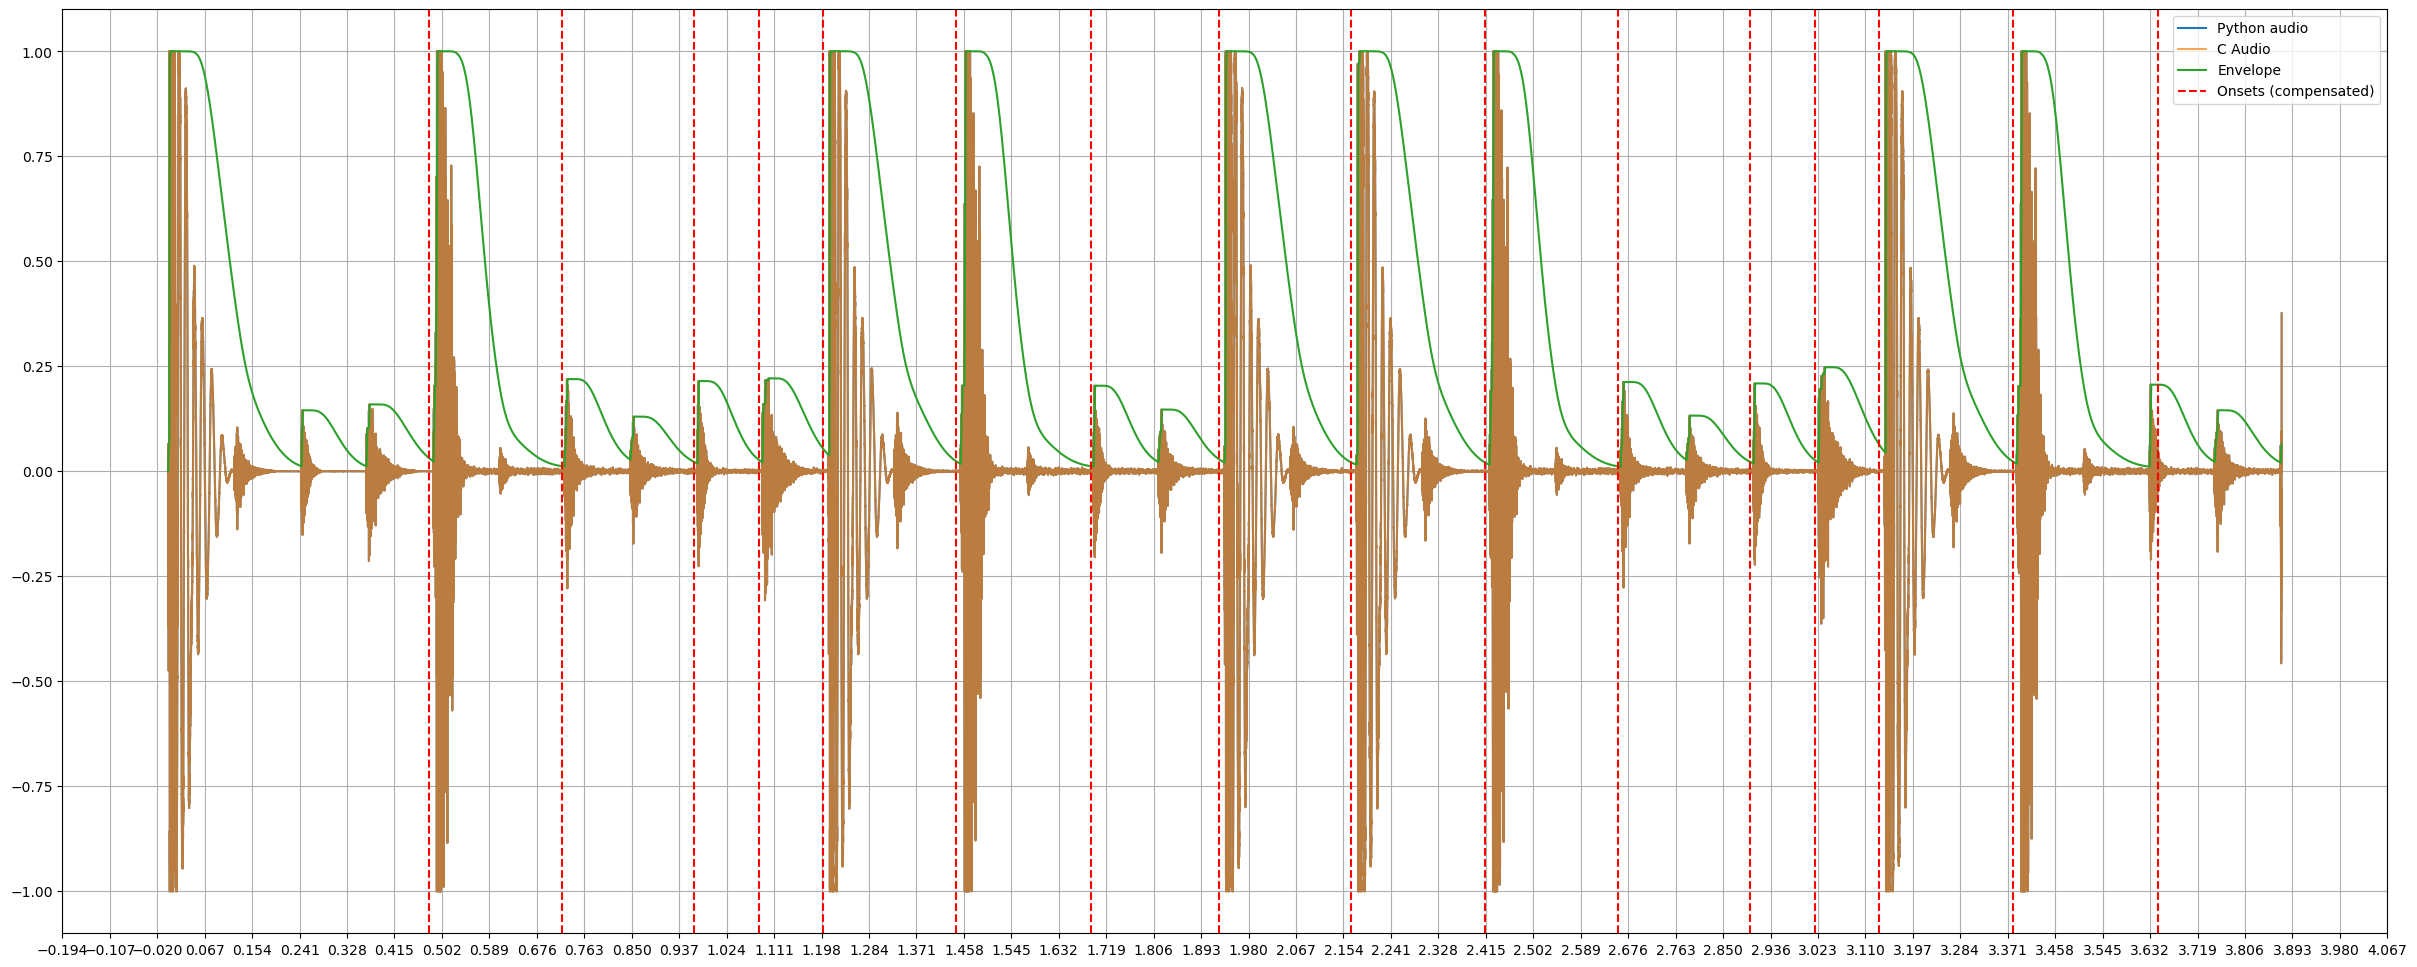

21 - 20230323_100 gecs - Dumbest girl alive lyrics video
Tempo:  150.0
TA1:  0.014885416666666667
TA2:  0.17104166666666668
-------
TA1 python percentile:  0.014544270833333333
TA2 python percentile::  0.16848697916666666


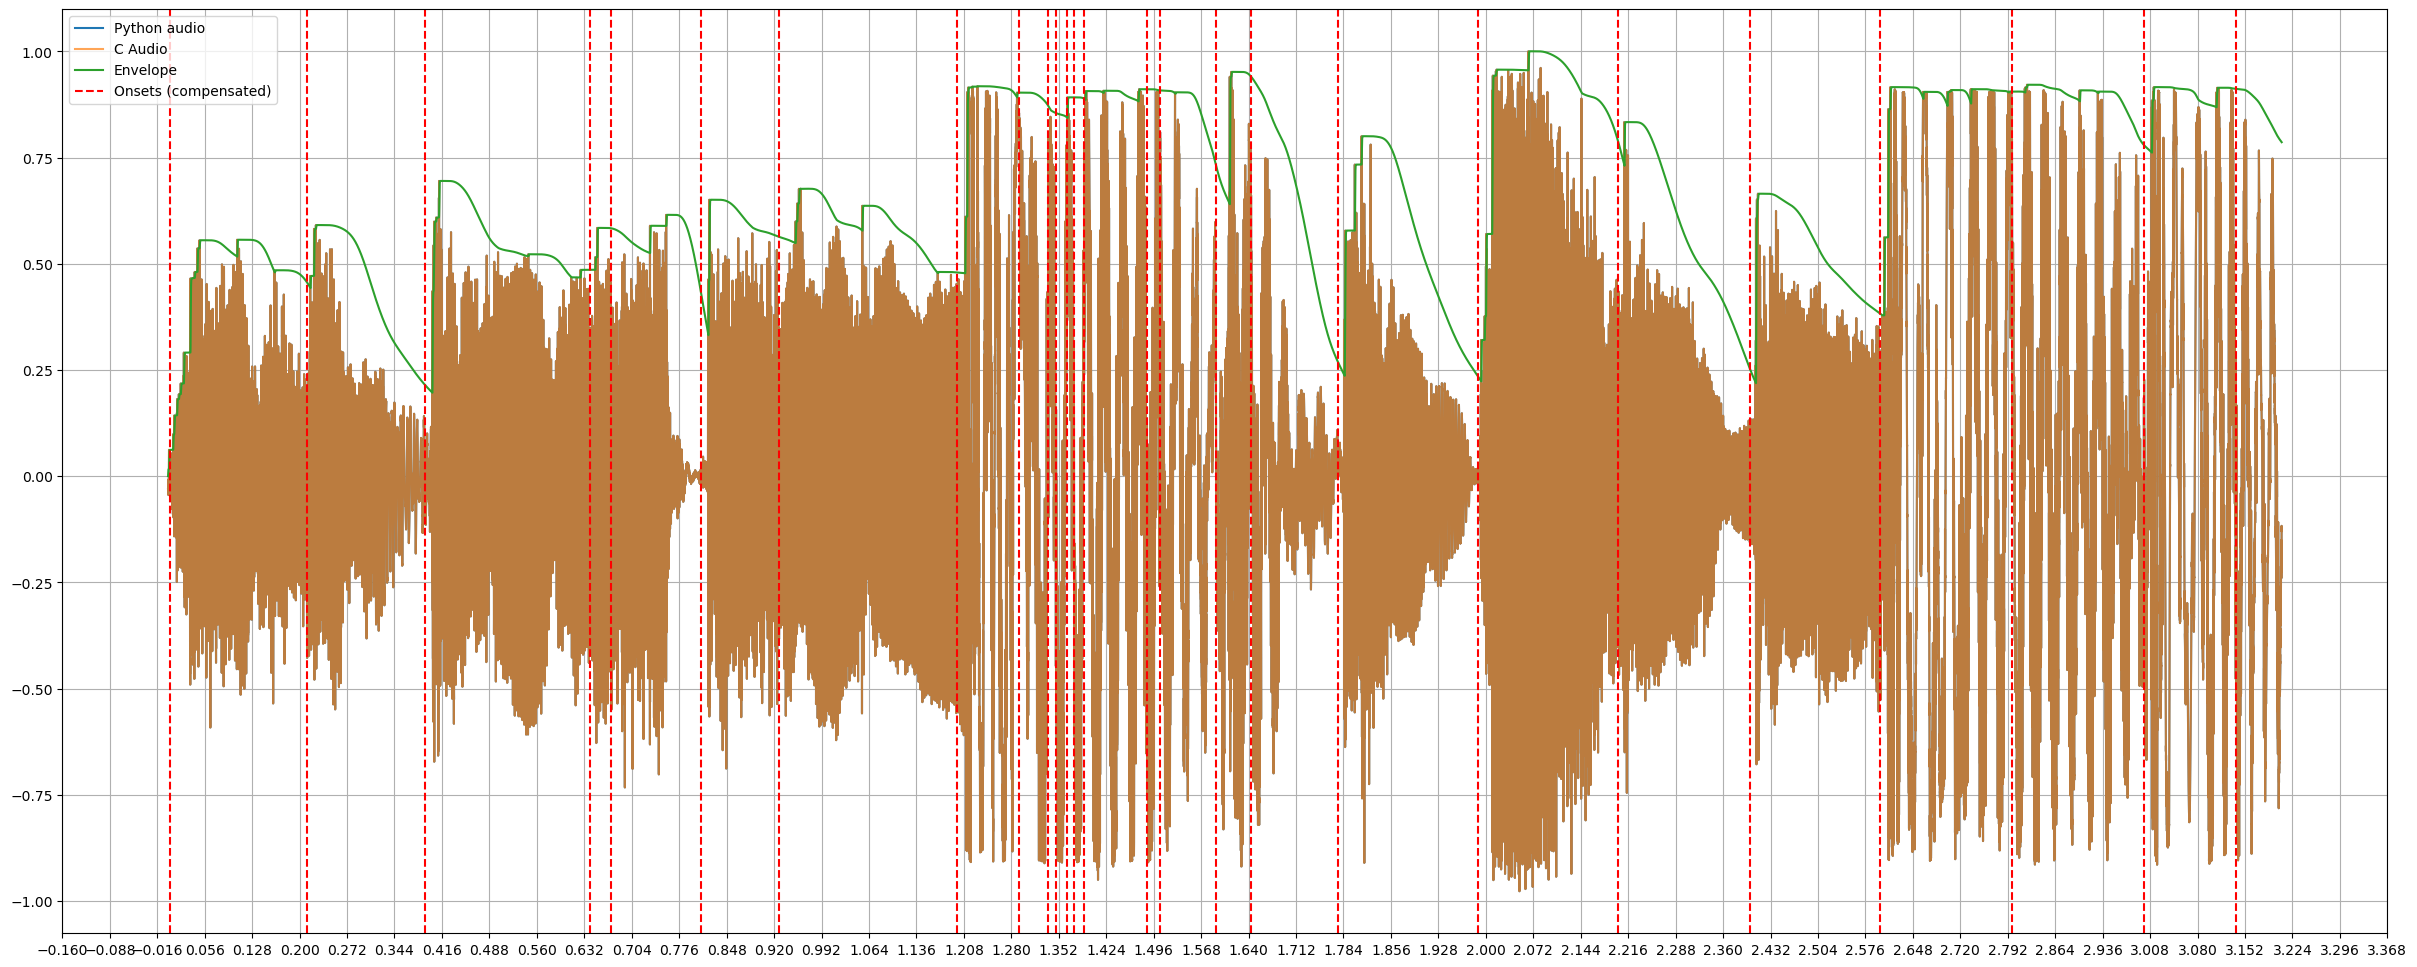

23 - 20220811_Westberlin Bass
Tempo:  150.0
TA1:  0.05739583333333333
TA2:  0.19275
-------
TA1 python percentile:  0.05768229166666666
TA2 python percentile::  0.1956171875


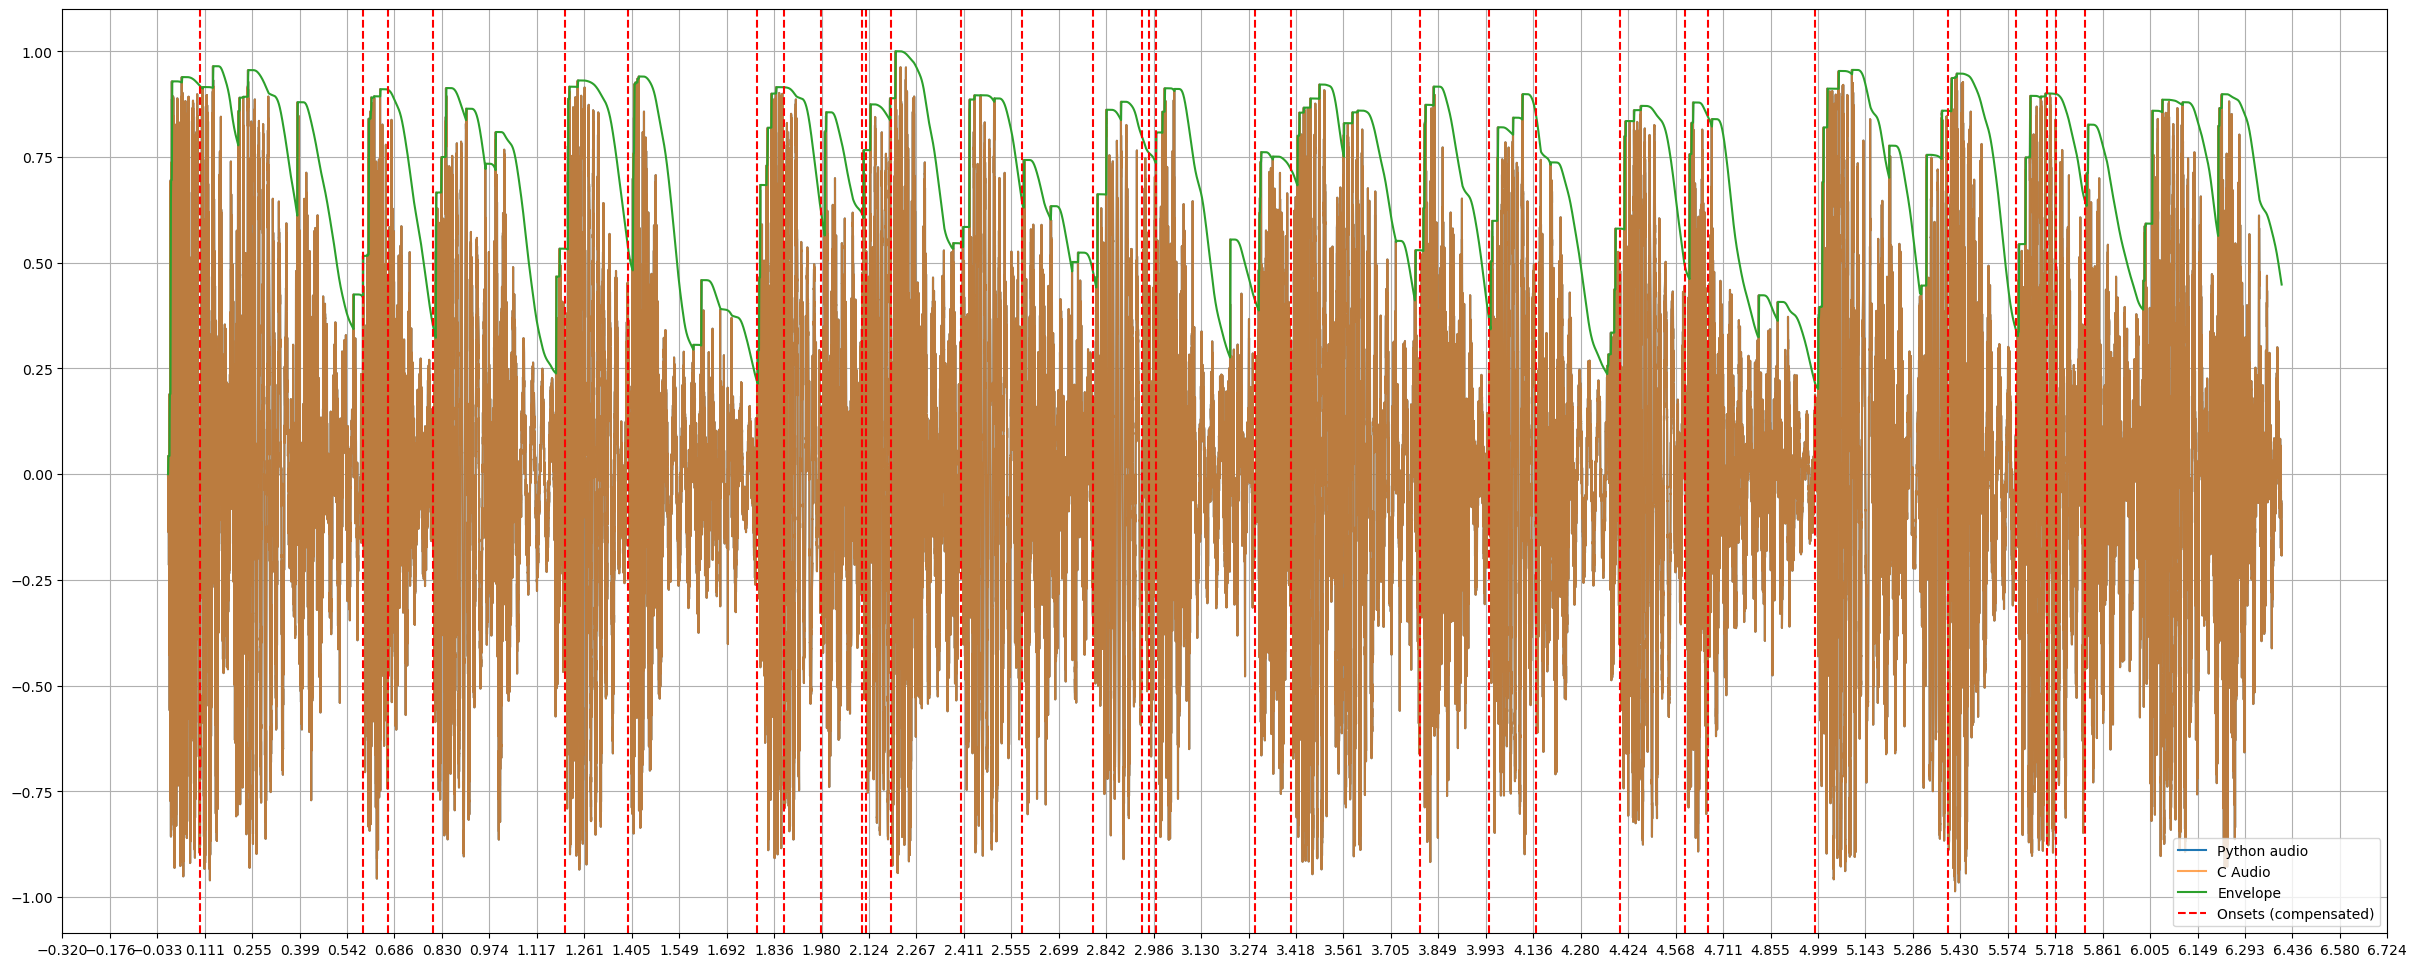

26 - Jorja Smith - Teenage Fantasy
Tempo:  175.78125
TA1:  0.04053125
TA2:  0.15770833333333334
-------
TA1 python percentile:  0.04053125
TA2 python percentile::  0.15770833333333334


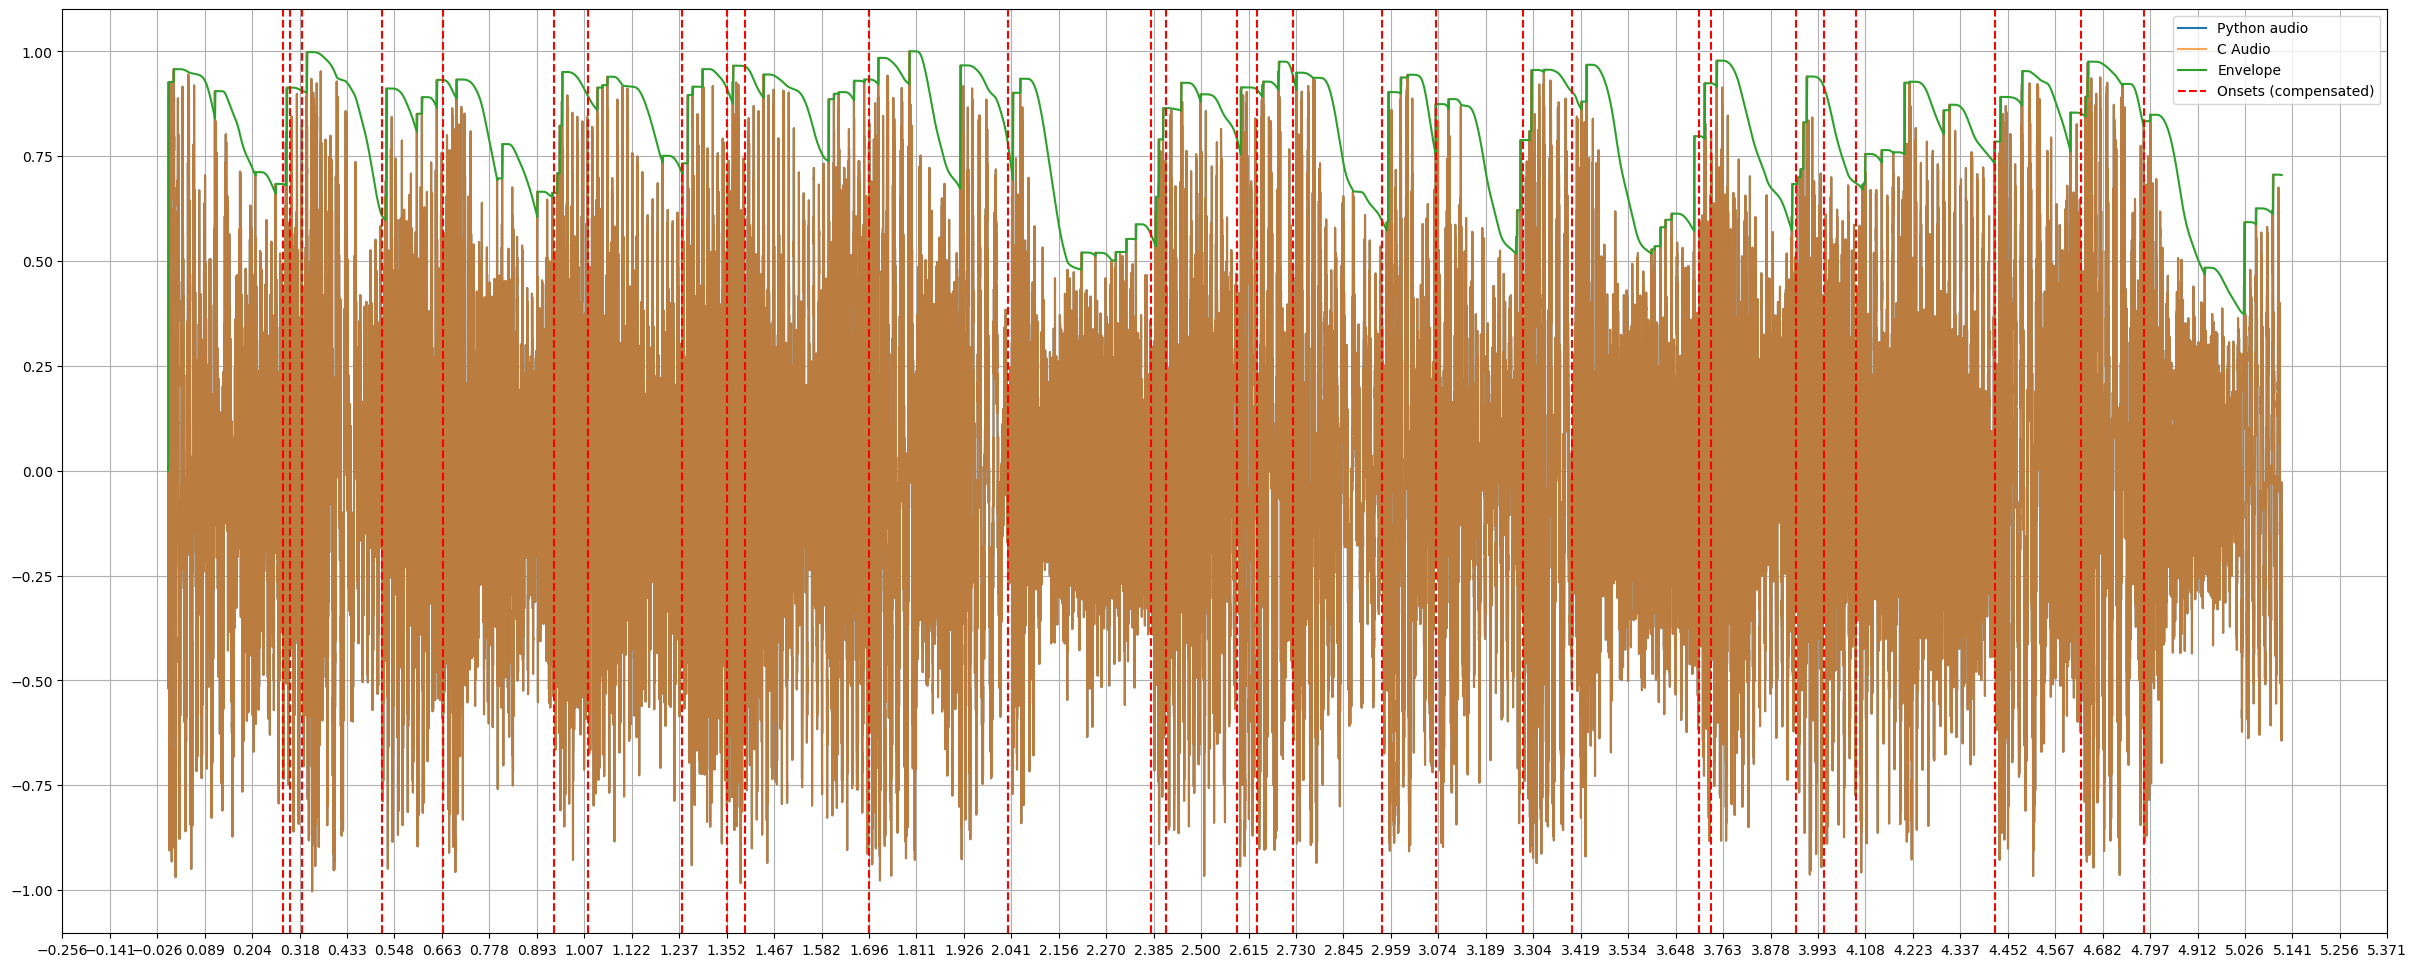

7 - 330744__alonnaallen__90s-beat-loop-140bpm
Tempo:  186.7219917012448
TA1:  0.017125
TA2:  0.30520833333333336
-------
TA1 python percentile:  0.017125
TA2 python percentile::  0.30520833333333336


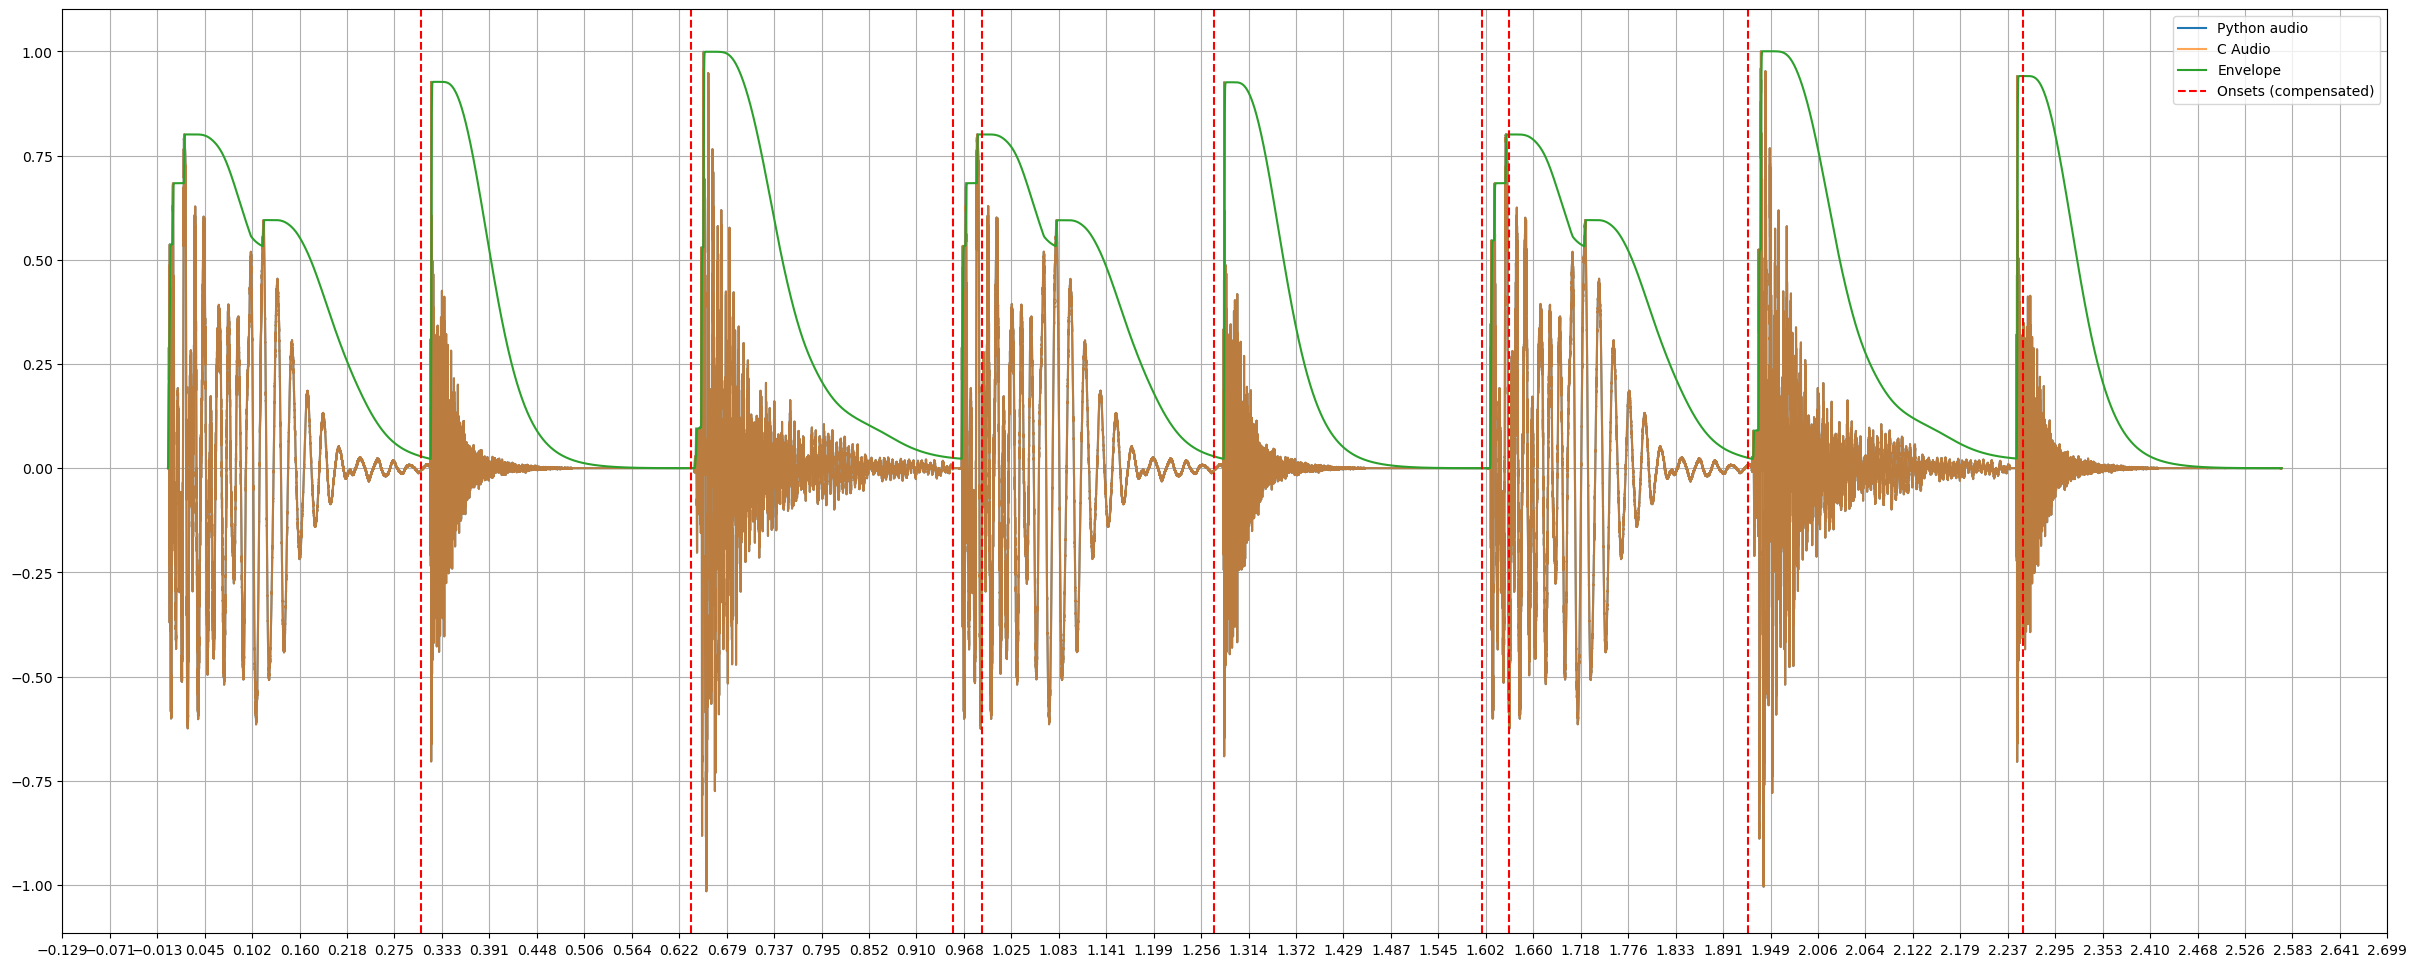

asdf
Tempo:  123.96694214876032
TA1:  0.012260416666666666
TA2:  0.22507291666666668
-------
TA1 python percentile:  0.012260416666666666
TA2 python percentile::  0.22507291666666668


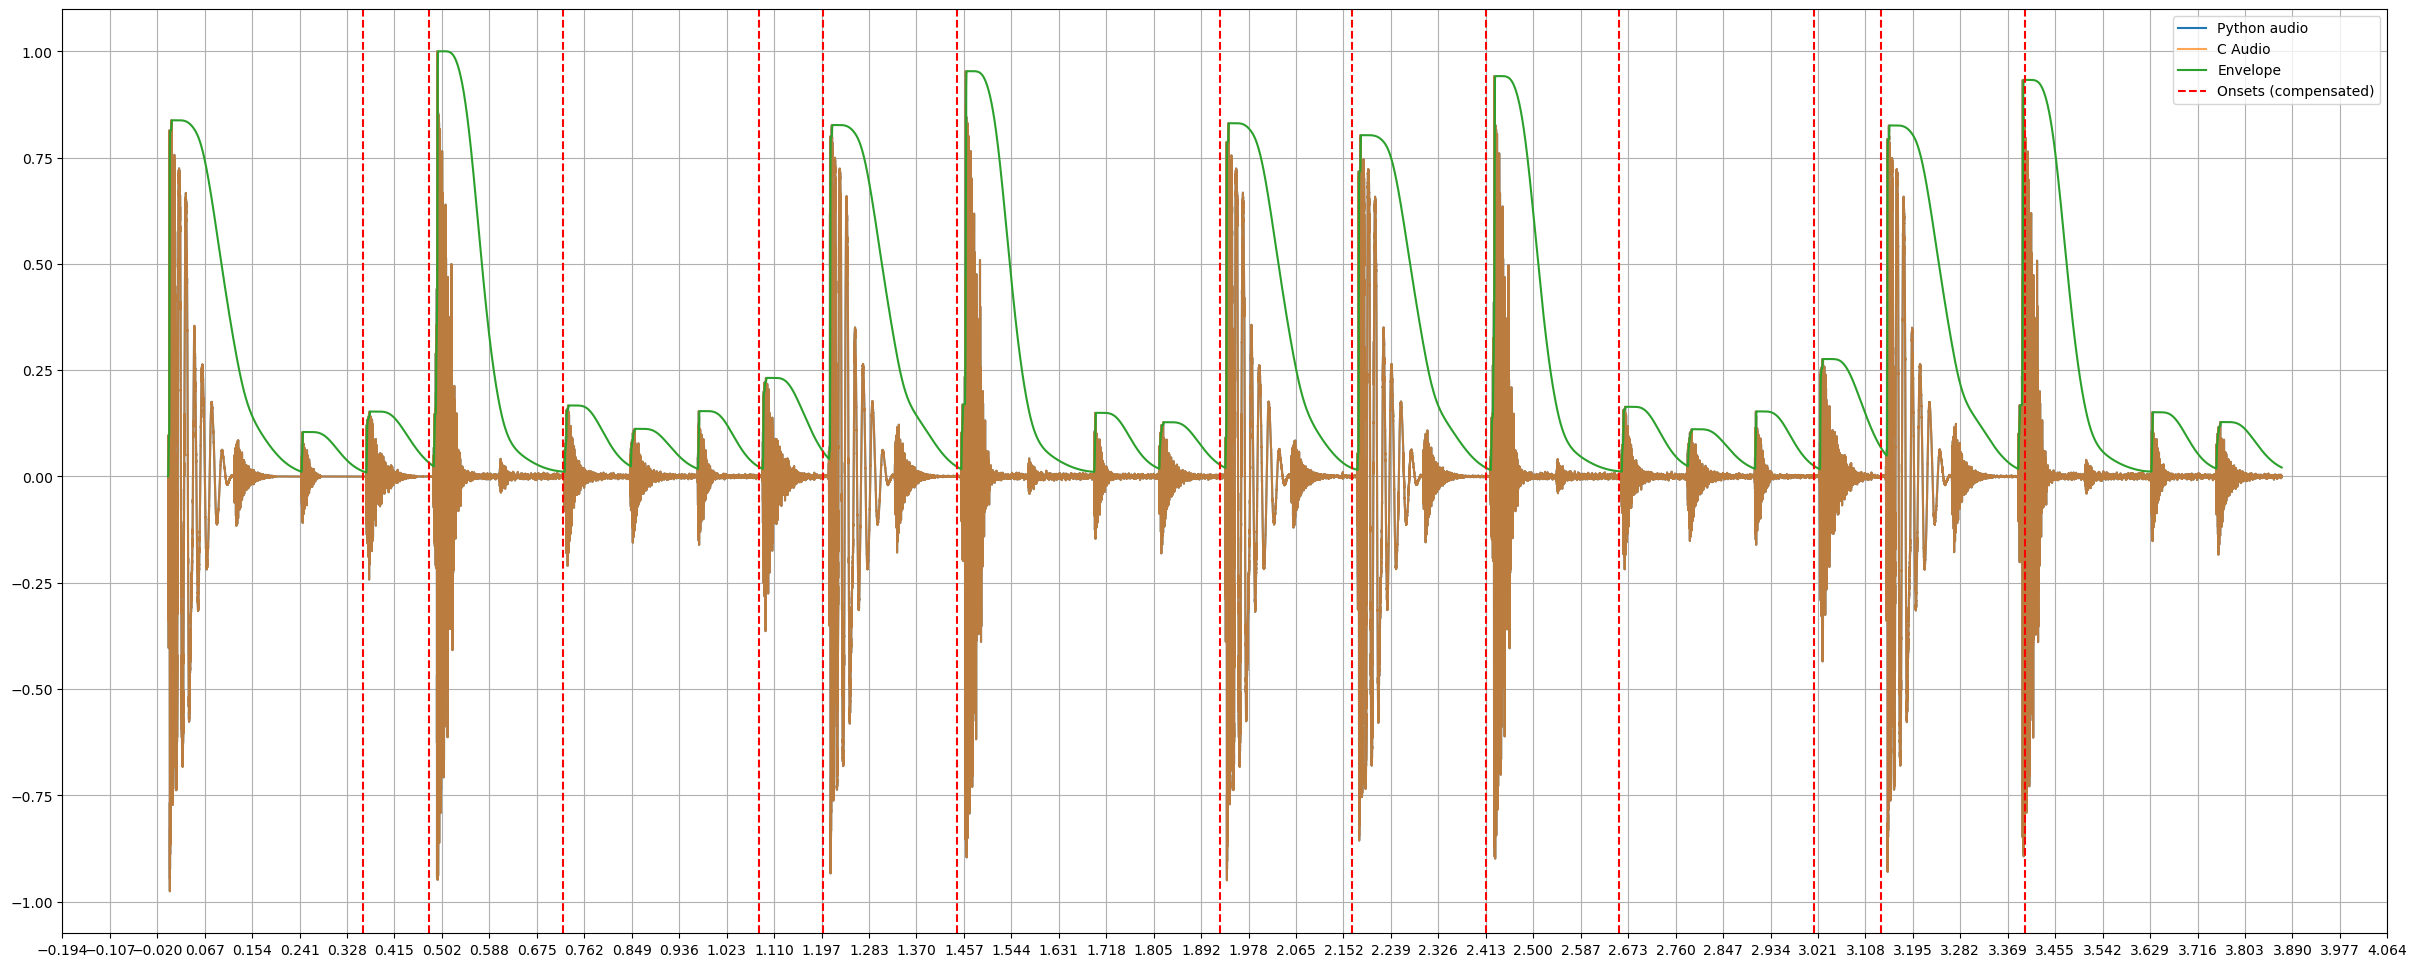

elli
Tempo:  156.794425087108
TA1:  0.009802083333333333
TA2:  0.20279166666666668
-------
TA1 python percentile:  0.009802083333333333
TA2 python percentile::  0.20279166666666668


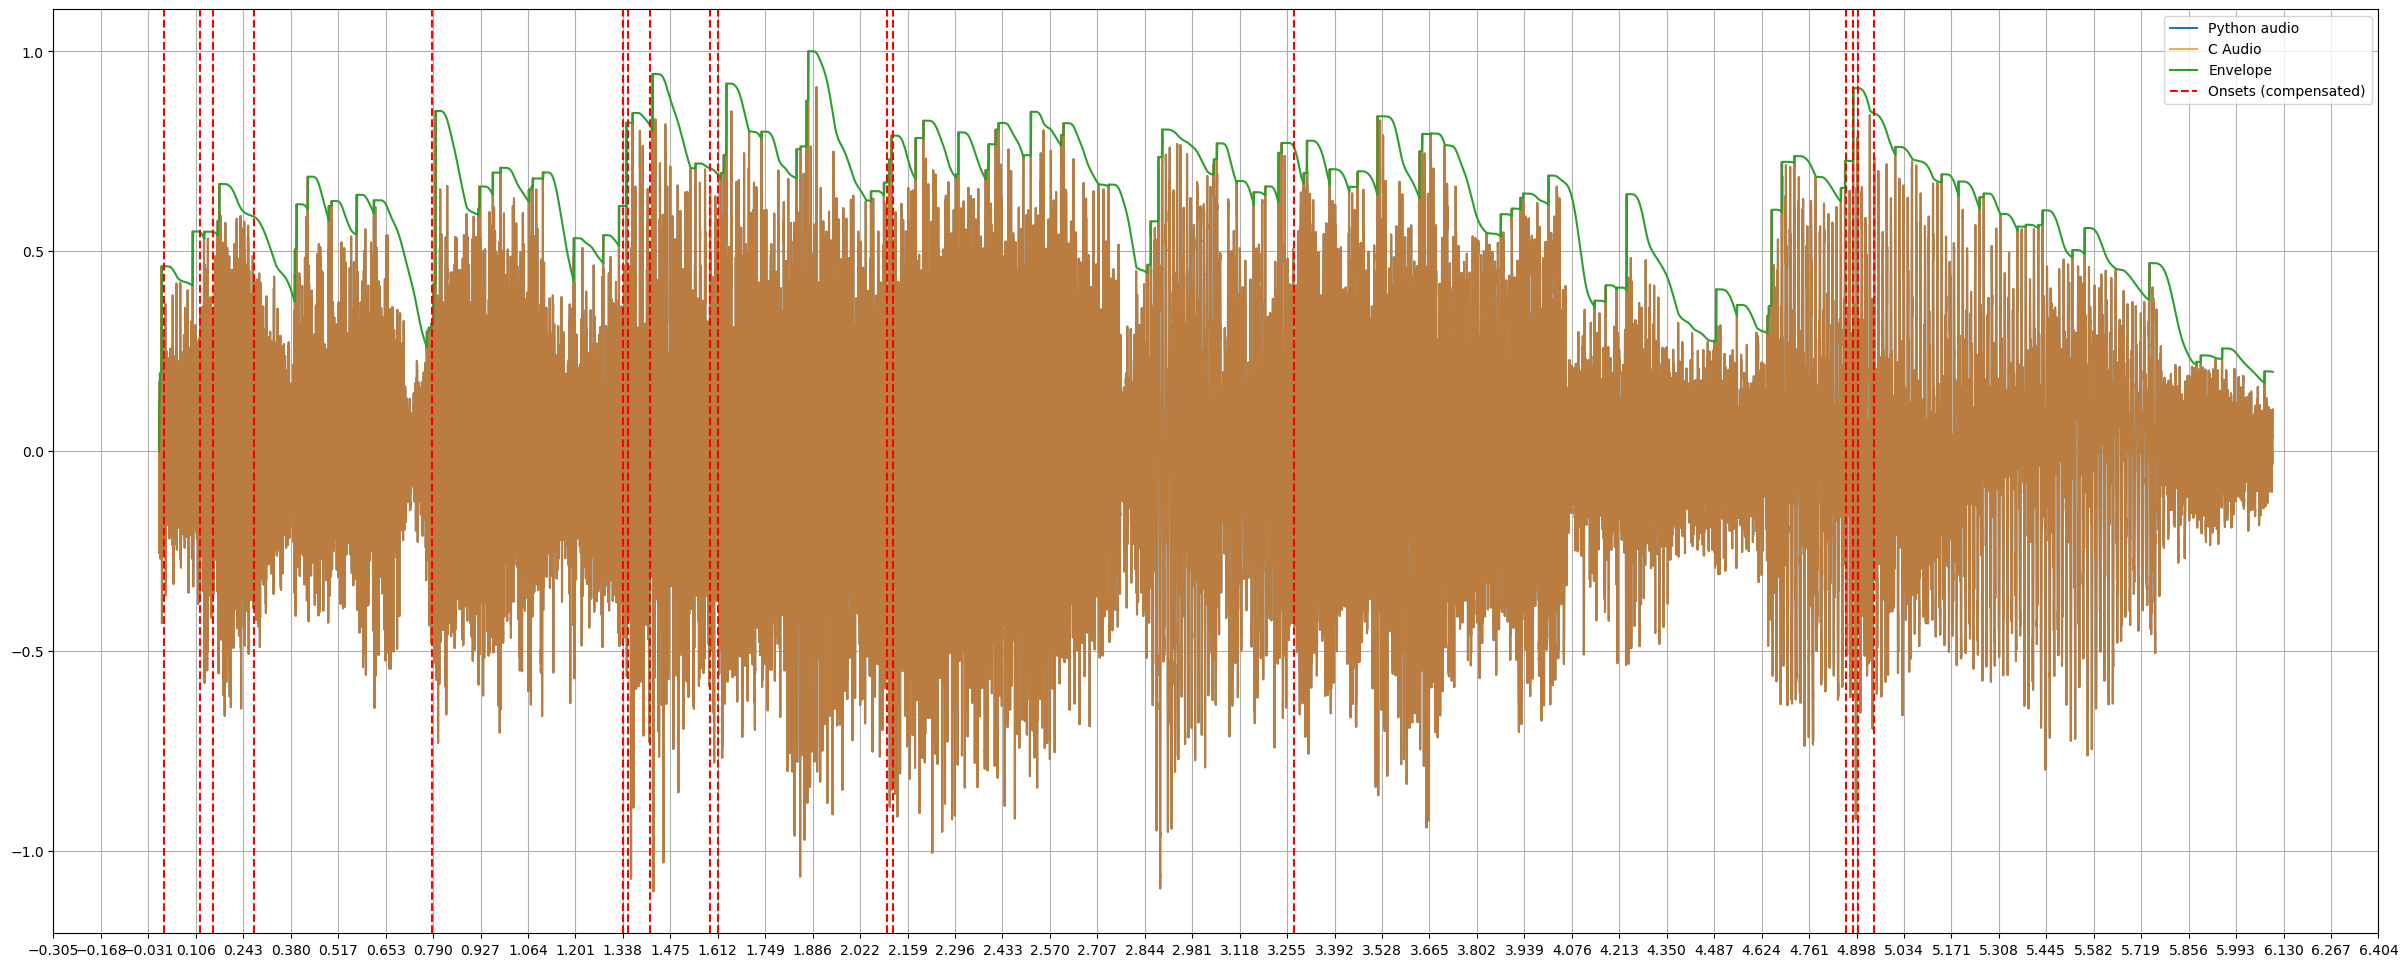

In [4]:
sampleRate = 96000
BEAT_DETECTION_BUFFER_SIZE = 64
AUDIO_BUFFER_SIZE_S = 8
AUDIO_BUFFER_SIZE = sampleRate * AUDIO_BUFFER_SIZE_S
MAX_ONSETS = 4 * AUDIO_BUFFER_SIZE_S # 4 BPS IS 240 BPM


from ctypes import *
lib = CDLL("../src/af/AFInC.dll")  # Adjust path accordingly

lib.resetBuffer.argtypes = []
lib.resetBuffer.restype = None

lib.initAf.argtypes = []
lib.initAf.restype = None

lib.AFInCAppend.argtypes = [c_double]
lib.AFInCAppend.restype = None

lib.AFInCProcess.argtypes = []
lib.AFInCProcess.restype = None

lib.afGetT1A.argtypes = []
lib.afGetT1A.restype = c_double

lib.afGetT2A.argtypes = []
lib.afGetT2A.restype = c_double

lib.afGetTempo.argtypes = []
lib.afGetTempo.restype = c_double


# ----------------------------------------
# debug helpers
# ----------------------------------------
lib.__getAudioBuffer.argtypes = []
lib.__getAudioBuffer.restype = c_double

lib.__getEnvBuffer.argtypes = []
lib.__getEnvBuffer.restype = c_double

lib.__getOnsetBuffer.argtypes = []
lib.__getOnsetBuffer.restype = c_double

lib.__getTA1Buffer.argtypes = []
lib.__getTA1Buffer.restype = c_double

lib.__getTA2Buffer.argtypes = []
lib.__getTA2Buffer.restype = c_double

lib.__resetIndexDebug.argtypes = []
lib.__resetIndexDebug.restype = None


for song in audio_data_with_labels:
    lib.__resetIndexDebug()

    target_device_audio_buffer = []
    envelope = []
    onsets = []
    TA1Buffer = []
    TA2Buffer = []
    lib.initAf()
    lib.resetBuffer()

    print(song[1])
    for sample in song[0]:
        lib.AFInCAppend(sample)

    lib.AFInCProcess()
    
    print("Tempo: ", lib.afGetTempo())
    print("TA1: ", lib.afGetT1A() / sample_rate)
    print("TA2: ", lib.afGetT2A() / sample_rate)
    print("-------")
    
    for sample in song[0]:
        target_device_audio_buffer.append(lib.__getAudioBuffer())
        envelope.append(lib.__getEnvBuffer())
    
    for onset in range(MAX_ONSETS):
        currentOnset = lib.__getOnsetBuffer()
        if(currentOnset == 0):
            break
        currentTA1 = lib.__getTA1Buffer() / sample_rate
        curretnTA2 = lib.__getTA2Buffer() / sample_rate
        onsets.append(currentOnset)
        TA1Buffer.append(currentTA1)
        TA2Buffer.append(curretnTA2)
        # print("-------")
        #print(currentOnset / sample_rate)
        #print(currentTA1)
        # print(curretnTA2)
        # print("-------")

    print("TA1 python percentile: ", np.percentile(TA1Buffer, 75))
    print("TA2 python percentile:: ", np.percentile(TA2Buffer, 75))

    plt.figure(figsize=(30, 12))
    ax = plt.gca()  # Get the current axes for customization
    ax.xaxis.set_major_locator(ticker.LinearLocator(numticks=50))

    plt.plot([i/sampleRate for i in range(len(song[0]))], song[0], label="Python audio")
    plt.plot([i/sampleRate for i in range(len(target_device_audio_buffer))], target_device_audio_buffer, alpha=0.7, label="C Audio")
    plt.plot([i/sampleRate for i in range(len(envelope))], envelope, label="Envelope")
    for i, onset in enumerate(onsets):
        if int(onset) != 0:
            if i == 0:
                plt.axvline(x=int(onset)/sampleRate, color='r', linestyle='--', label="Onsets (compensated)")
            else:
                plt.axvline(x=int(onset)/sampleRate, color='r', linestyle='--')
        
    plt.legend()
    plt.grid()
    plt.show()
